In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_noise_doe_experiments_input.csv", index_col=0)
output = pd.read_csv("exp_noise_doe_experiments_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [13]:
mf_rbf_gpr_results["ck_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["ck_learned_noise_std"]-0.3)
mf_rbf_gpr_results["mkg_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["mkg_learned_noise_std"]-0.3)
mf_rbf_gpr_results["hk_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["hk_learned_noise_std"]-0.3)
mf_rbf_gpr_results["sk_learned_noise_std"] = np.absolute(
    mf_rbf_gpr_results["sk_learned_noise_std"]-0.3)

mf_Bohachevsky
Forrester_1b
mf_Booth
mf_Borehole
mf_CurrinExp
mf_Hartman3
mf_Hartman6
mf_Park91A
mf_Park91B
mf_Sixhump


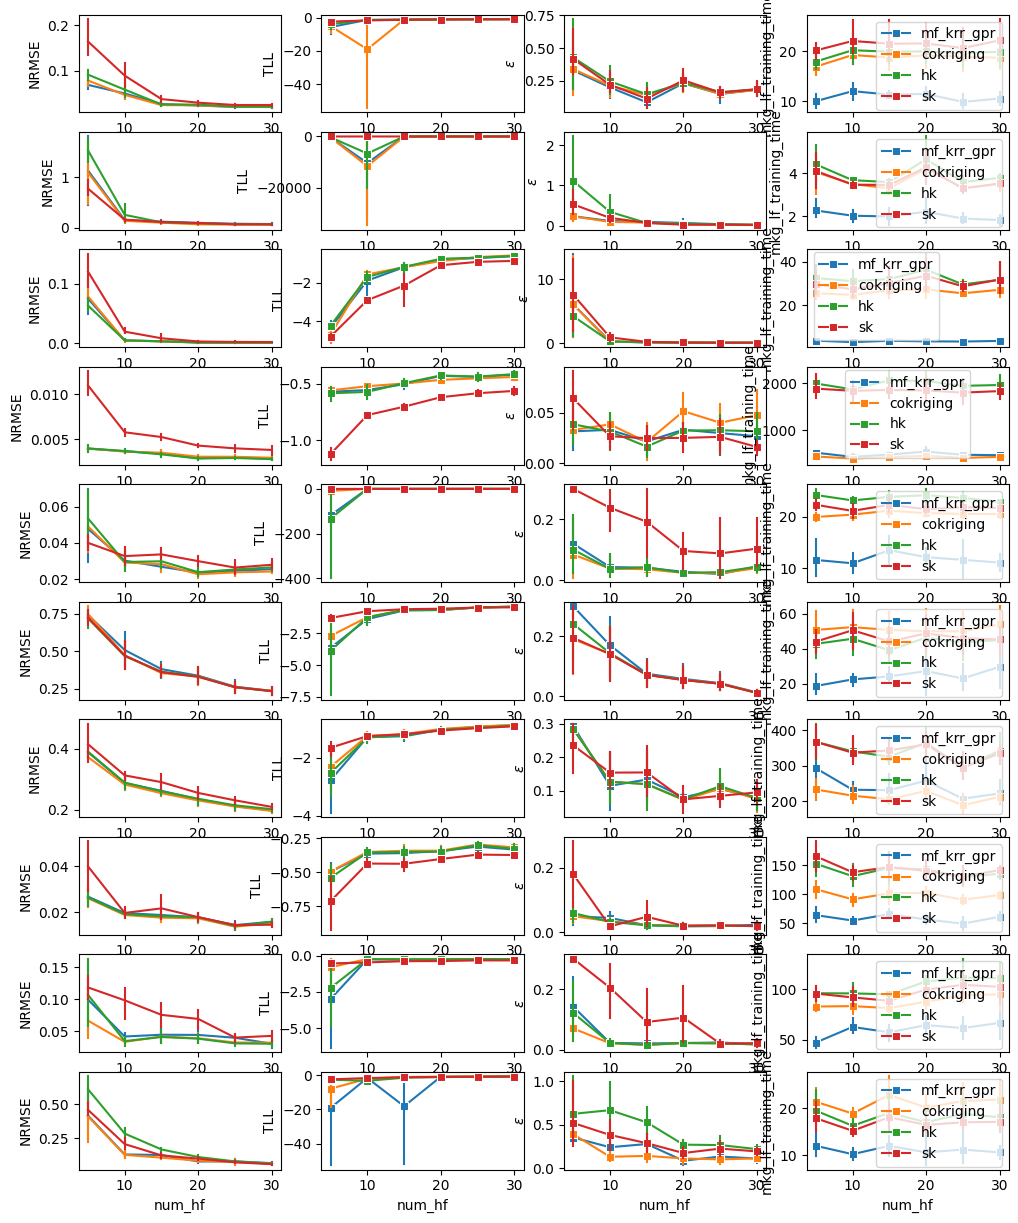

In [20]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y

problems = mf_rbf_gpr_results["problem"].unique()
fig, ax = plt.subplots(10, 4, figsize=(12, 15))
for ii, problem in enumerate(problems):
    print(problem)
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="mkg_normalized_rmse",
        err_style="bars",
        ax=ax[ii, 0],
        label="mf_krr_gpr",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="ck_normalized_rmse",
        ax=ax[ii, 0],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="hk_normalized_rmse",
        ax=ax[ii, 0],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="sk_normalized_rmse",
        err_style="bars",
        ax=ax[ii, 0],
        label="sk",
    )

    # set the legend to be none
    ax[ii, 0].legend().set_visible(False)
    ax[ii, 0].set_ylabel("NRMSE")
    # plot for the log likelihood
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="mkg_mean_log_likelihood",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="mf_krr_gpr",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="ck_mean_log_likelihood",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="hk_mean_log_likelihood",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="sk_mean_log_likelihood",
        marker="s",
        legend="full",
        ax=ax[ii, 1],
        label="sk",
        err_style="bars",
    )
    ax[ii, 1].legend().set_visible(False)
    ax[ii, 1].set_ylabel("TLL")

# for the learned noise
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="mkg_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="mf_krr_gpr",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="ck_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="hk_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="sk_learned_noise_std",
        marker="s",
        legend="full",
        ax=ax[ii, 2],
        label="sk",
        err_style="bars",
    )
    ax[ii, 2].legend().set_visible(False)
    ax[ii, 2].set_ylabel(r"$\epsilon$")
    # plot for the inference time
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="mkg_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 3],
        label="mf_krr_gpr",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="ck_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 3],
        label="cokriging",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="hk_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 3],
        label="hk",
        err_style="bars",
    )
    sns.lineplot(
        data=mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] == problem],
        x="num_hf",
        y="sk_lf_training_time",
        marker="s",
        legend="full",
        ax=ax[ii, 3],
        label="sk",
        err_style="bars",
    )

# ax[1].set_xlim(10, 30)
# ax[1].set_title("Log Likelihood")

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()